In [1]:
import tensorflow as tf
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

<ipython-input-1-1c2d46bdb836>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook as tqdm


In [2]:
os.chdir('C:/Users/sunde/7th SEM Project/brain_tumor_dataset/yes')
X = []
y = []
for i in tqdm(os.listdir()):
    img = cv2.imread(i)   
    img = cv2.resize(img,(224,224))
    X.append(img)
    y.append((i[0:1]))
    #print(i[0:1])

  0%|          | 0/155 [00:00<?, ?it/s]

In [3]:
os.chdir('C:/Users/sunde/7th SEM Project/brain_tumor_dataset/no')
for i in tqdm(os.listdir()):
    img = cv2.imread(i)   
    img = cv2.resize(img,(224,224))
    X.append(img)
for i in range(1,99):
    y.append('N')
print(y)

  0%|          | 0/98 [00:00<?, ?it/s]

['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',

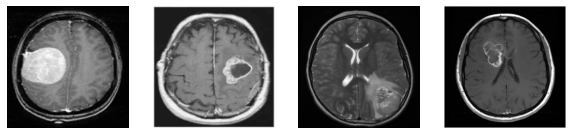

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X[i], cmap="gray")
    plt.axis('off')
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print ("Shape of an image in X_train: ", X_train[0].shape)
print ("Shape of an image in X_test: ", X_test[0].shape)

Shape of an image in X_train:  (224, 224, 3)
Shape of an image in X_test:  (224, 224, 3)


In [6]:
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test) 

In [7]:
print("X_train Shape: ", X_train.shape) 
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape) 
print("y_test Shape: ", y_test.shape)

X_train Shape:  (169, 224, 224, 3)
X_test Shape:  (84, 224, 224, 3)
y_train Shape:  (169, 2)
y_test Shape:  (84, 2)


In [8]:
from keras.applications import vgg16

img_rows, img_cols = 224, 224 


vgg = vgg16.VGG16(weights = 'imagenet', 
                 include_top = False, 
                 input_shape = (img_rows, img_cols, 3))

for layer in vgg.layers:
    layer.trainable = False
    
for (i,layer) in enumerate(vgg.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [9]:
def lw(bottom_model, num_classes):
    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(512,activation='relu')(top_model)
    top_model = Dense(num_classes,activation='softmax')(top_model)
    return top_model 

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

from keras.models import Model
num_classes = 2

FC_Head = lw(vgg, num_classes)

model = Model(inputs = vgg.input, outputs = FC_Head)

print(model.summary())

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [11]:
from tensorflow.keras.models import Model
model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [12]:
history = model.fit(X_train,y_train,
                    epochs=15, 
                    validation_data=(X_test,y_test),
                    verbose = 1,
                    initial_epoch=0)

Epoch 1/15
6/6 [==============================] - 27s 5s/step - loss: 5.6589 - accuracy: 0.5444 - val_loss: 0.5374 - val_accuracy: 0.7381
Epoch 2/15
6/6 [==============================] - 30s 5s/step - loss: 0.9346 - accuracy: 0.6746 - val_loss: 0.7890 - val_accuracy: 0.6071
Epoch 3/15
6/6 [==============================] - 31s 5s/step - loss: 0.3860 - accuracy: 0.8284 - val_loss: 0.7415 - val_accuracy: 0.7857
Epoch 4/15
6/6 [==============================] - 32s 5s/step - loss: 0.2380 - accuracy: 0.9112 - val_loss: 0.5765 - val_accuracy: 0.7738
Epoch 5/15
6/6 [==============================] - 32s 5s/step - loss: 0.1332 - accuracy: 0.9586 - val_loss: 0.5855 - val_accuracy: 0.7976
Epoch 6/15
6/6 [==============================] - 32s 5s/step - loss: 0.0938 - accuracy: 0.9586 - val_loss: 0.8139 - val_accuracy: 0.8333
Epoch 7/15
6/6 [==============================] - 33s 6s/step - loss: 0.0568 - accuracy: 0.9763 - val_loss: 0.6412 - val_accuracy: 0.8095
Epoch 8/15
6/6 [==================

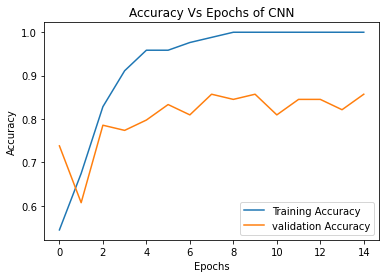

In [13]:
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='validation Accuracy')
plt.legend()
plt.title('Accuracy Vs Epochs of CNN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy');

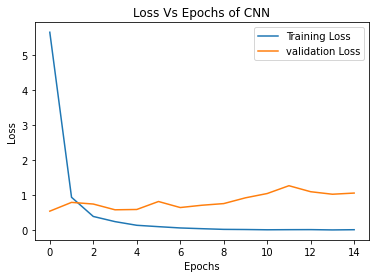

In [14]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='validation Loss')
plt.legend()
plt.title('Loss Vs Epochs of CNN')
plt.xlabel('Epochs')
plt.ylabel('Loss');

In [29]:
# Convert into numpy arrays
images = np.array(X) / 255.0
labels = np.array(y)

In [30]:
# Perform One-hot encoding

label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)
labels = to_categorical(labels)

print(labels[0])

[0. 1.]


In [31]:
# Evaluate the model
predictions = model.predict(X_test, batch_size=8)
predictions = np.argmax(predictions, axis= 1)
actuals = np.argmax(y_test, axis= 1)

In [32]:
# Print Classification report and Confusion matrix

print(classification_report(actuals, predictions))
cm = confusion_matrix(actuals, predictions)
print(cm)

              precision    recall  f1-score   support

           0       0.86      0.76      0.81        33
           1       0.85      0.92      0.89        51

    accuracy                           0.86        84
   macro avg       0.86      0.84      0.85        84
weighted avg       0.86      0.86      0.86        84

[[25  8]
 [ 4 47]]
